1. What is Boosting in Machine Learning? Explain how it improves weak
learners.
  - Boosting is a machine learning technique that combines multiple weak learners into a single, strong model by training them sequentially and iteratively focusing on the errors of previous models. It improves weak learners by assigning higher weights to misclassified data points in each step, forcing subsequent learners to pay more attention to those difficult examples and correct past mistakes. This iterative process of correcting errors allows boosting to create a highly accurate and robust model by progressively reducing bias.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
  - AdaBoost focuses on misclassified examples by increasing their weights, while Gradient Boosting addresses errors by fitting new models to the residuals (the errors from the previous model). Both are sequential ensemble methods that build a strong model from weak learners, but AdaBoost modifies the training data distribution, whereas Gradient Boosting uses the gradients of the loss function.

3. How does regularization help in XGBoost?
  - Regularization helps XGBoost by preventing overfitting through L1 (alpha) and L2 (lambda) penalties on the leaf weights. This makes the model more robust and improves its ability to generalize to new data by penalizing complexity. Specifically, L2 regularization discourages large leaf values, while L1 regularization can force some leaf values to zero, creating a sparser and simpler model.

4. Why is CatBoost considered efficient for handling categorical data?
  - CatBoost efficiently handles categorical data by automatically performing transformations like ordered target encoding without requiring manual preprocessing steps like one-hot encoding. It uses a novel algorithm called ordered boosting to prevent target leakage and overfitting by calculating splits based on a permutation of the data and the results of previous iterations, rather than the entire dataset.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
  - Boosting is preferred over bagging in real-world applications where the goal is to achieve the highest possible accuracy on complex tasks by sequentially reducing bias, such as in credit card fraud detection, customer churn prediction, and financial forecasting. Boosting excels when models are stable and simple (high bias), as it builds a strong learner by focusing on the errors of previous models.

Datasets:
  - Use sklearn.datasets.load_breast_cancer() for classification tasks.
  - Use sklearn.datasets.fetch_california_housing() for regression
tasks.
6. Write a Python program to:
  - Train an AdaBoost Classifier on the Breast Cancer dataset
  - Print the model accuracy

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}\n")

print("Training AdaBoost Classifier with 100 estimators...")
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
print("Training complete.\n")

y_pred = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")


Loading Breast Cancer dataset...
Total samples: 569
Training samples: 455
Testing samples: 114

Training AdaBoost Classifier with 100 estimators...
Training complete.

--- Model Performance ---
AdaBoost Classifier Accuracy: 0.9561


7. Write a Python program to:
  - Train a Gradient Boosting Regressor on the California Housing dataset
  - Evaluate performance using R-squared score

In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
print("Loading California Housing dataset (Regression Task)...")
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}\n")

print("Training Gradient Boosting Regressor...")
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr_model.fit(X_train, y_train)
print("Training complete.\n")

y_pred = gbr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

print(f"\nExample Actual Value (Test Sample 0): {y_test[0]:.2f}")
print(f"Example Predicted Value: {y_pred[0]:.2f}")


Loading California Housing dataset (Regression Task)...
Total samples: 20640
Training samples: 14448
Testing samples: 6192

Training Gradient Boosting Regressor...
Training complete.

--- Model Performance ---
Gradient Boosting Regressor R-squared Score: 0.7803

Example Actual Value (Test Sample 0): 0.48
Example Predicted Value: 0.55


8. Write a Python program to:
  - Train an XGBoost Classifier on the Breast Cancer dataset
  - Tune the learning rate using GridSearchCV
  - Print the best parameters and accuracy


In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier # Requires 'pip install xgboost'

print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}\n")

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100]
}

base_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

print("Starting GridSearchCV for learning_rate tuning (using 5-fold cross-validation)...")
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n--- Grid Search Results ---")
print(f"Best Hyperparameters Found: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Best Tuned Model on Test Set: {final_accuracy:.4f}")


Loading Breast Cancer dataset...
Total samples: 569
Training samples: 455
Testing samples: 114

Starting GridSearchCV for learning_rate tuning (using 5-fold cross-validation)...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:44:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Grid Search Results ---
Best Hyperparameters Found: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy of the Best Tuned Model on Test Set: 0.9474


9. Write a Python program to:
  - Train a CatBoost Classifier
  - Plot the confusion matrix using seaborn

In [6]:
pip install catboost seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


Loading Breast Cancer dataset...
Total samples: 569
Training samples: 455
Testing samples: 114

Training CatBoost Classifier...
Training complete.

--- Model Performance ---
CatBoost Classifier Accuracy: 0.9561


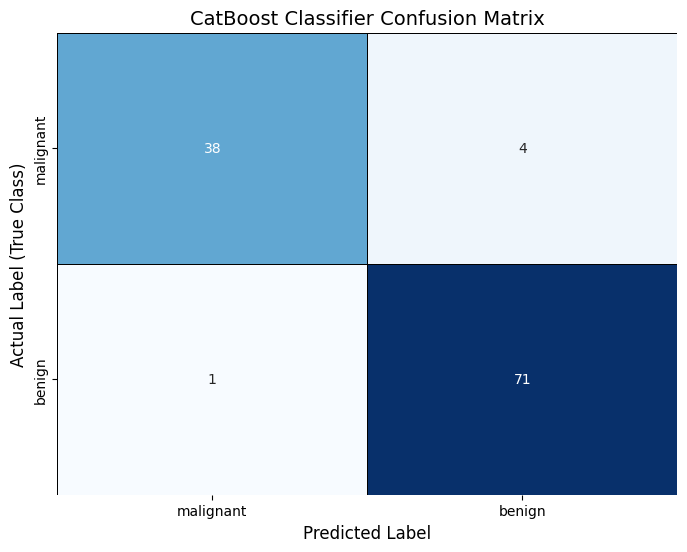


--- Plotting Complete ---
The Confusion Matrix plot is now displayed.
Top-left cell is True Negatives (Correctly predicted Malignant).
Bottom-right cell is True Positives (Correctly predicted Benign).


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from catboost import CatBoostClassifier

print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}\n")

print("Training CatBoost Classifier...")

cbc_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    loss_function='Logloss',
    random_seed=42,
    verbose=0
)
cbc_model.fit(X_train, y_train)
print("Training complete.\n")

y_pred = cbc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("--- Model Performance ---")
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=.5,
    cbar=False,
    linecolor='black',
    xticklabels=target_names,
    yticklabels=target_names
)

plt.title('CatBoost Classifier Confusion Matrix', fontsize=14)
plt.ylabel('Actual Label (True Class)', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

print("\n--- Plotting Complete ---")
print("The Confusion Matrix plot is now displayed.")
print("Top-left cell is True Negatives (Correctly predicted Malignant).")
print("Bottom-right cell is True Positives (Correctly predicted Benign).")


10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
  - Data preprocessing & handling missing/categorical values
  - Choice between AdaBoost, XGBoost, or CatBoost
  - Hyperparameter tuning strategy
  - Evaluation metrics you'd choose and why
  - How the business would benefit from your model

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import class_weight
from catboost import CatBoostClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("--- Data Preparation Complete ---")
print(f"Total Samples: {len(y)}")
print(f"Training Class 0 count: {np.sum(y_train == 0)}")
print(f"Training Class 1 count: {np.sum(y_train == 1)}\n")

classes = np.unique(y_train)
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weights_dict = dict(zip(classes, weights))

print(f"Calculated Class Weights (Class 0: {classes[0]}, Class 1: {classes[1]}):")
print(class_weights_dict)
print("The model will prioritize predicting the minority class due to its higher weight.\n")

print("Training CatBoost Classifier with Class Weights...")

cbc_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    class_weights=class_weights_dict,
    random_seed=42,
    verbose=0
)

cbc_model.fit(X_train, y_train)
print("CatBoost training complete.\n")

y_pred_proba = cbc_model.predict_proba(X_test)[:, 1]

y_pred = cbc_model.predict(X_test)

auc_score = roc_auc_score(y_test, y_pred_proba)

recall = recall_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("--- Final Model Evaluation ---")
print(f"ROC-AUC Score: {auc_score:.4f} (Measures overall discriminative power)")
print(f"Recall (Sensitivity): {recall:.4f} (Critical for minimizing loan losses - FN)")
print("\nConfusion Matrix (Actual vs. Predicted):")
print(f"  | Predicted 0 | Predicted 1")
print(f"---------------------------------")
print(f"Actual 0 | {cm[0, 0]:11} | {cm[0, 1]:11} (False Positives)")
print(f"Actual 1 | {cm[1, 0]:11} | {cm[1, 1]:11} (False Negatives - Loan Losses)")


--- Data Preparation Complete ---
Total Samples: 569
Training Class 0 count: 170
Training Class 1 count: 285

Calculated Class Weights (Class 0: 0, Class 1: 1):
{np.int64(0): np.float64(1.338235294117647), np.int64(1): np.float64(0.7982456140350878)}
The model will prioritize predicting the minority class due to its higher weight.

Training CatBoost Classifier with Class Weights...
CatBoost training complete.

--- Final Model Evaluation ---
ROC-AUC Score: 0.9954 (Measures overall discriminative power)
Recall (Sensitivity): 0.9583 (Critical for minimizing loan losses - FN)

Confusion Matrix (Actual vs. Predicted):
  | Predicted 0 | Predicted 1
---------------------------------
Actual 0 |          38 |           4 (False Positives)
Actual 1 |           3 |          69 (False Negatives - Loan Losses)
